## Importing Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [145]:
data=pd.read_csv(r'C:\Users\Nabil\Desktop\data_sc\datasets\googleplaystore.csv')

In [146]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [148]:
data.shape

(10841, 13)

In [149]:
#handling missing data
totale=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([totale,percentage],axis=1,keys=['totale','percent'])
missing_data.head(6)

,totale,percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [150]:
data.dropna(how='any',inplace=True)

In [151]:
totale=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([totale,percentage],axis=1,keys=['totale','percent'])
missing_data.head(6)

,totale,percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


## Results:

## Category

In [152]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

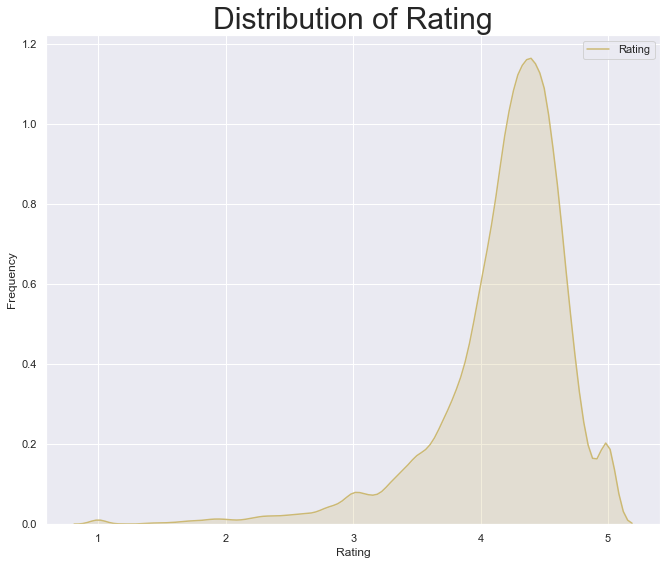

In [153]:
sns.set(style='darkgrid')
rcParams['figure.figsize']=11,9
g=sns.kdeplot(data.Rating,color='y',shade=True)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')
plt.title("Distribution of Rating",size=30)

## Results:

## Rating analysis

## Category

In [154]:
print('Dataset has a ', len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

Dataset has a  33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

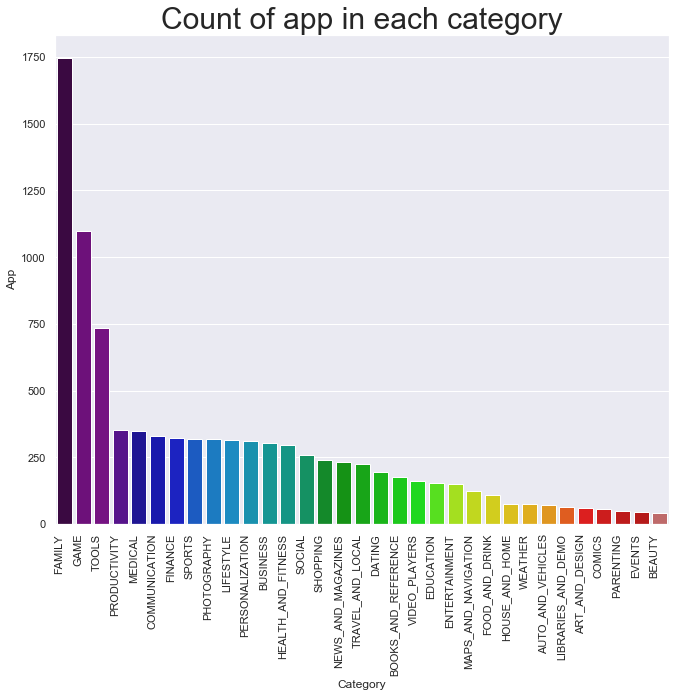

In [157]:
## counting 
categories=data.groupby(['Category']).App.count().reset_index().sort_values(by='App',ascending=False)
a=sns.barplot(x='Category',y='App',data=categories,palette='nipy_spectral')
a.set_xticklabels(a.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size=30)

Text(0.5, 1.0, 'Raing of Apps in each category')

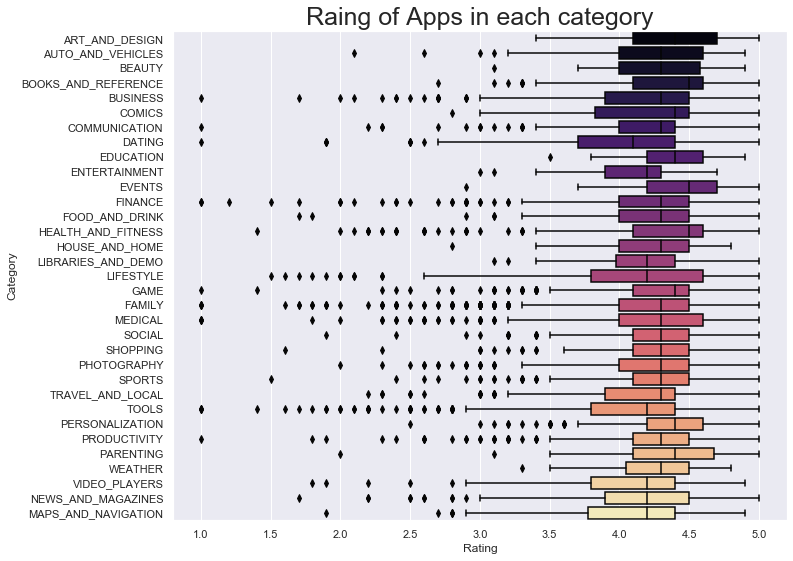

In [158]:
a=sns.boxplot(x='Rating',y='Category',data=data,palette='magma')
plt.title('Raing of Apps in each category',size=25)

## Reviews

In [159]:
# converting Reviews's data type to numerical
data.Reviews=data.Reviews.astype(int)

In [160]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

Text(0.5, 1.0, 'Distribution of Reviews')

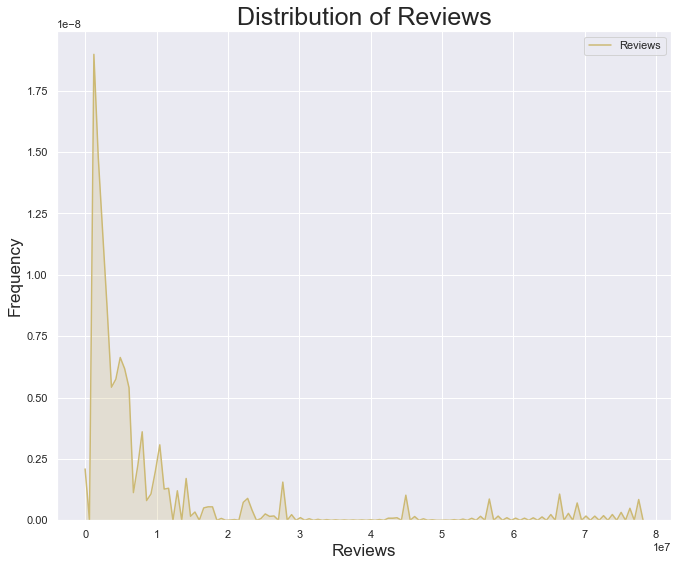

In [161]:
# Reviews distribution
rcParams['figure.figsize']=11,9
a=sns.kdeplot(data.Reviews,color='y',shade=True)
a.set_xlabel('Reviews',size=17)
a.set_ylabel('Frequency',size=17)
plt.title('Distribution of Reviews',size=25)

In [162]:
data[data.Reviews<1000000].shape

(8656, 13)

In [163]:
data[data.Reviews>3000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device


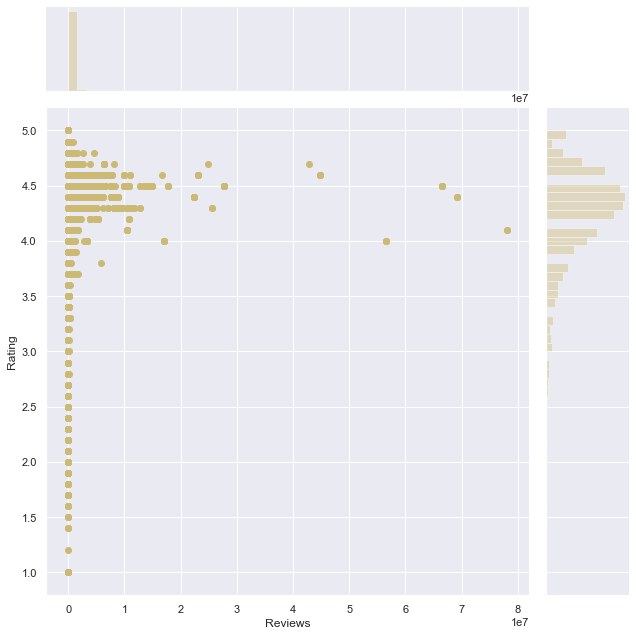

In [165]:
a=sns.jointplot('Reviews','Rating',data=data,size=9,color='y')

Text(0.5, 1.0, 'Rating vs Reviews')

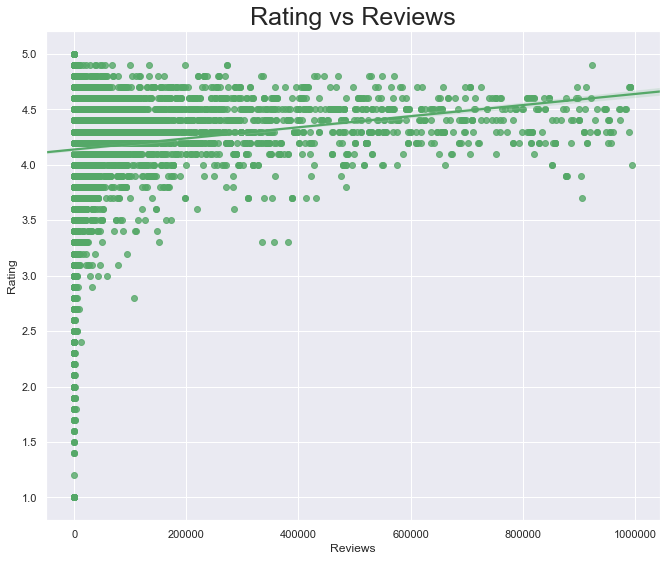

In [166]:
rcParams['figure.figsize']=11,9
a=sns.regplot(x='Reviews',y='Rating',data=data[data.Reviews<1000000],color='g')
plt.title('Rating vs Reviews',size=25)

# Number of Installation

In [167]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [168]:
## It is preferable to encode it by numbs

In [169]:
data.Installs=data.Installs.replace(r'[\,\+]', '', regex=True).astype(int)

In [170]:
install_sorted=sorted(data.Installs.unique())

In [175]:
install_sorted

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [180]:
data.Installs.replace(install_sorted,range(0,len(install_sorted),1),inplace=True)

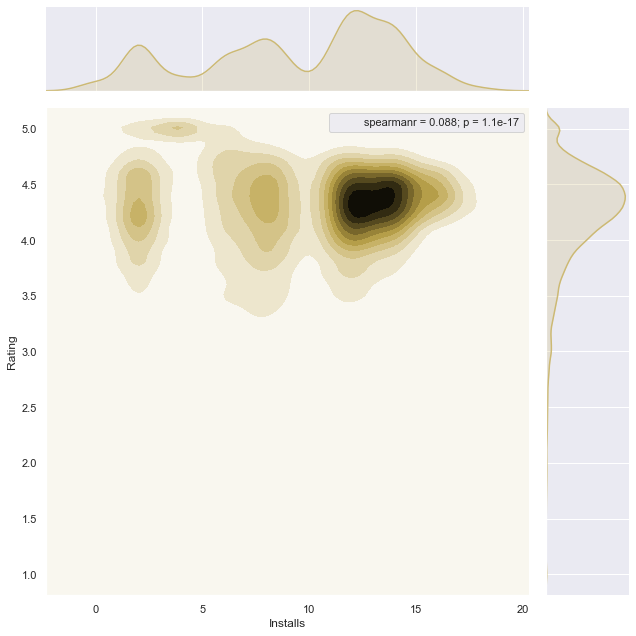

In [182]:
from scipy.stats import spearmanr
a=sns.jointplot(x='Installs',y='Rating',data=data,kind='kde',size=9,color='y',stat_func=spearmanr)

Text(0.5, 1.0, 'Relation Between Rating And Installs')

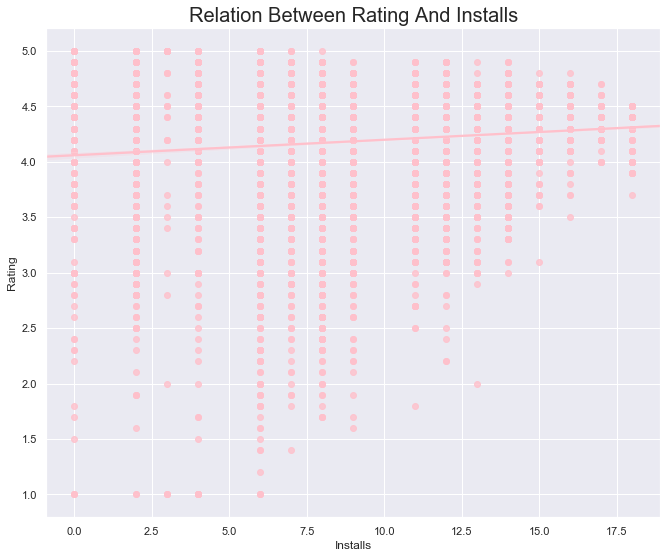

In [183]:
a=sns.regplot(x='Installs',y='Rating',data=data,color='pink')
plt.title('Relation Between Rating And Installs',size=20)

## Size

In [184]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [185]:
data.Size.replace('Varies with device',np.nan,inplace=True)

In [186]:
## Change size values to the same units
data.Size=(data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            \
            .replace(['k','M'], [10**3, 10**6]).astype(float))

In [187]:
## filling null values by the mean of each category
data.Size.fillna(data.groupby('Category')['Size'].transform('mean'),inplace=True)

In [188]:
data.Size

0        1.900000e+07
1        1.400000e+07
2        8.700000e+06
3        2.500000e+07
4        2.800000e+06
             ...     
10834    2.600000e+06
10836    5.300000e+07
10837    3.600000e+06
10839    1.468298e+07
10840    1.900000e+07
Name: Size, Length: 9360, dtype: float64

## Rating VS Size 

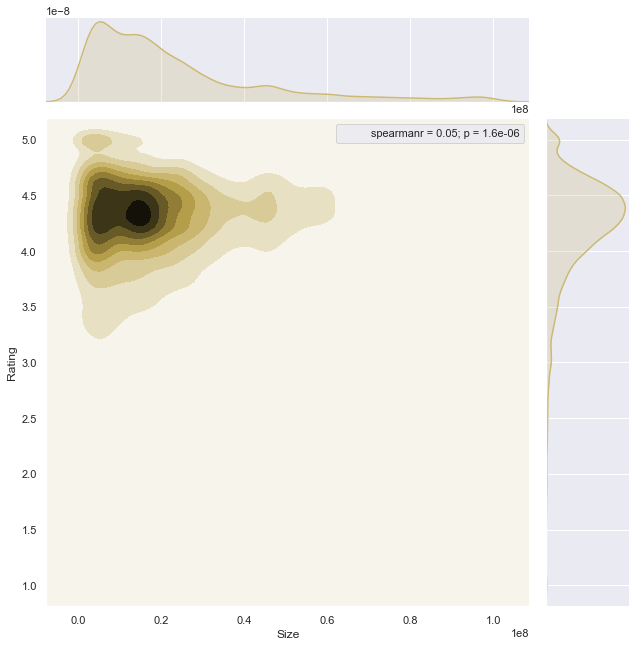

In [189]:
a=sns.jointplot(x='Size',y='Rating',data=data,color='y',size=9,kind='kde',stat_func=spearmanr)


Text(0.5, 1.0, 'Rating vs Size')

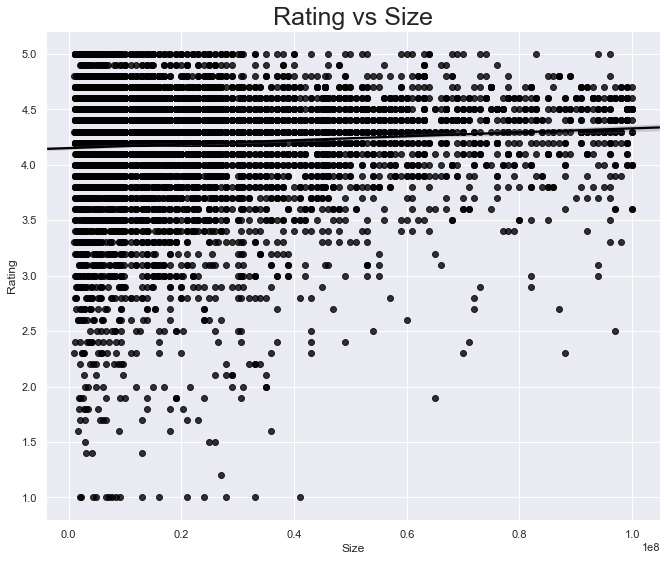

In [191]:
a=sns.regplot(x='Size',y='Rating',data=data,color='black')
plt.title('Rating vs Size',size=25)

## Relation between type ans Rating

In [192]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

## Counts Type

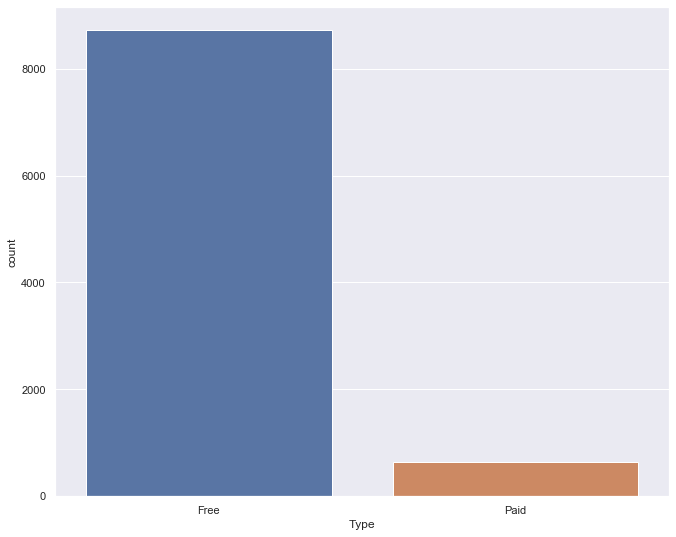

In [193]:
a=sns.countplot(x="Type",data=data)

In [194]:
percent=round(data.Type.value_counts(sort=True)/data.Type.count()*100,2).astype(str)+'%'
Type_values=pd.concat([data.Type.value_counts(sort=True),percent],axis=1,keys=['Totale','percent'])
Type_values

,Totale,percent
Free,8715,93.11%
Paid,645,6.89%


we need to change the format a little bit which allows us use it in modeling after if we want 

In [195]:
type_dum=pd.get_dummies(data['Type'])
type_dum.drop(['Paid'],axis=1,inplace=True)
data=pd.concat([data,type_dum],axis=1)


In [196]:
# now we drop Type column
data.drop(['Type'],axis=1,inplace=True)

## Price

In [197]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [198]:
data.Price=data.Price.apply(lambda x:float(x.replace('$','')))

In [199]:
data.Price.describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Relation Between Price and Rating')

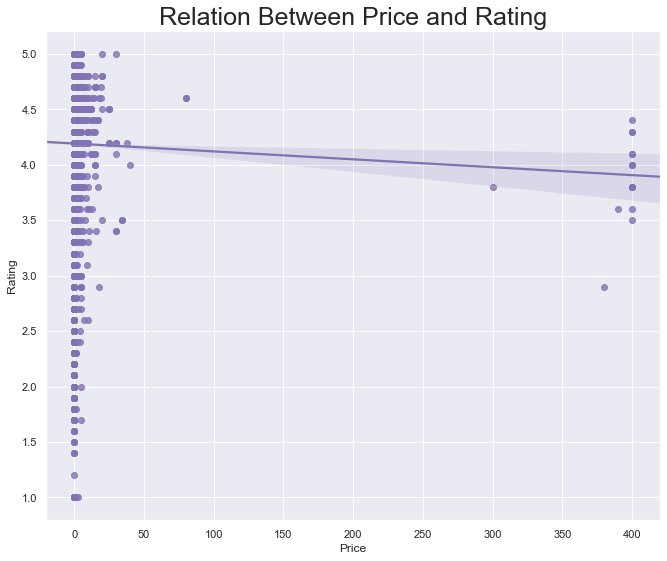

In [200]:
a=sns.regplot(x='Price',y='Rating',data=data,color='m')
plt.title('Relation Between Price and Rating',size=25)

In [55]:
## let's us check little bit for more details
data[data.Price==0].shape

(8715, 13)

In [201]:
bins=[-1,0.98,1,3,5,16,30,401]
labels=['Free','Cheap','Not Cheap','Medium','Expensive','Very expensive','Extra expensive']
data['Price category']=pd.cut(data.Price,bins,labels=labels)

In [202]:
data.groupby(['Price category'], as_index=False)['Rating'].mean()

,Price category,Rating
0,Free,4.186288
1,Cheap,4.303704
2,Not Cheap,4.291667
3,Medium,4.250318
4,Expensive,4.264583
5,Very expensive,4.269565
6,Extra expensive,3.923810


Text(0.5, 1, "Barplot of Rating's mean for each Price category")

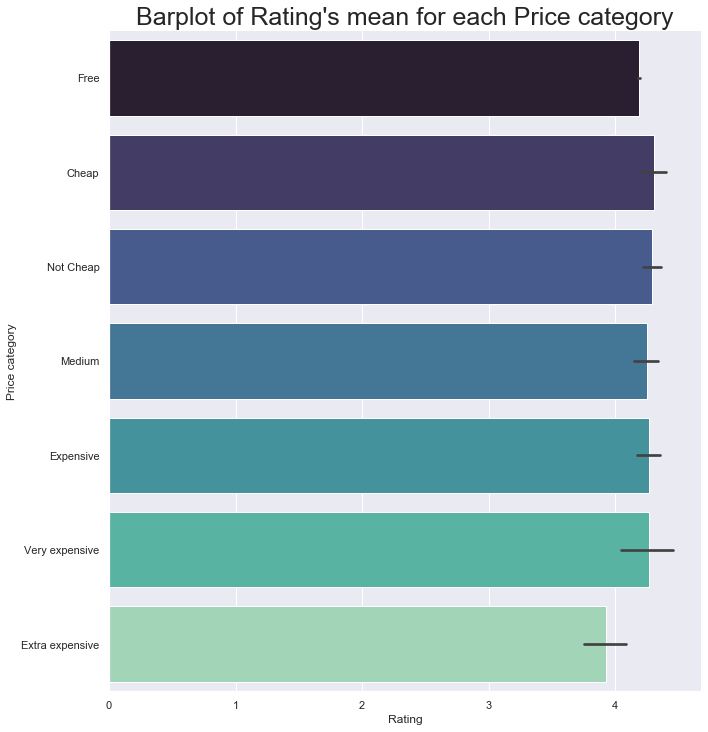

In [204]:
a=sns.catplot(x='Rating',y='Price category',data=data,kind='bar',height=10,palette='mako')
plt.title('Barplot of Rating\'s mean for each Price category',size=25)

## Results

## Genres:

In [233]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [236]:
data.Genres.value_counts()

Tools                  732
Entertainment          533
Education              468
Action                 358
Productivity           351
                      ... 
Card;Brain Games         1
Puzzle;Education         1
Arcade;Pretend Play      1
Board;Pretend Play       1
Strategy;Education       1
Name: Genres, Length: 115, dtype: int64

In [205]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [211]:
data.Genres.value_counts()

Tools                      733
Entertainment              577
Education                  563
Action                     375
Productivity               351
Medical                    350
Sports                     337
Communication              329
Finance                    323
Photography                317
Lifestyle                  315
Personalization            312
Business                   303
Health & Fitness           299
Casual                     262
Social                     259
Shopping                   238
News & Magazines           233
Travel & Local             226
Arcade                     223
Simulation                 212
Dating                     195
Books & Reference          180
Video Players & Editors    163
Puzzle                     147
Maps & Navigation          124
Role Playing               119
Racing                     114
Food & Drink               109
Strategy                   107
Educational                103
Adventure                   89
House & 

In [212]:
## We can Group Music & Audio  as  Music
data['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [225]:
data.groupby('Genres',as_index=False)['Rating'].mean().describe()

,Rating
count,47.000000
mean,4.210663
std,0.104402
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


Text(0.5, 1, "Barplot of Rating's mean for each Genre")

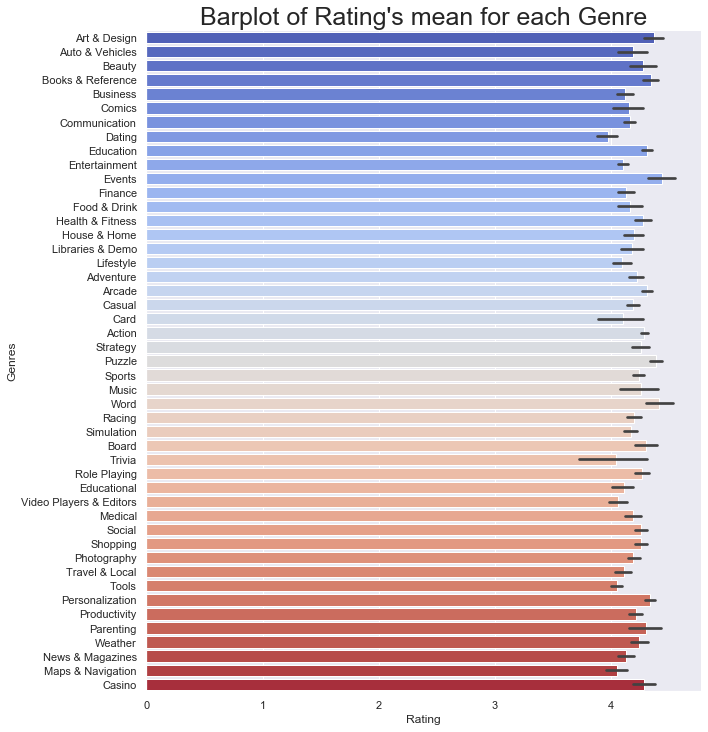

In [221]:
a=sns.catplot(x='Rating',y='Genres',data=data,kind='bar',height=10,palette='coolwarm')
plt.title('Barplot of Rating\'s mean for each Genre',size=25)

## Results

## Centent Rating

In [226]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [227]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'boxen plot of Rating Vs Content Rating')

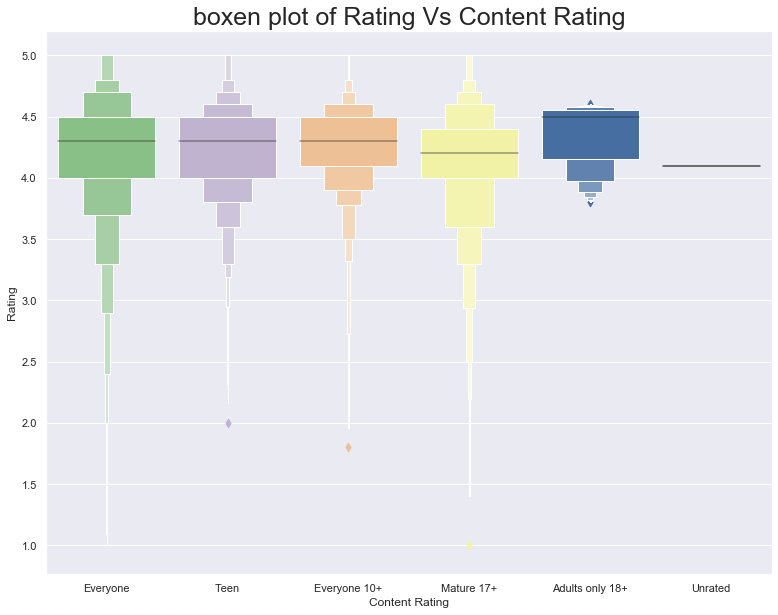

In [228]:
plt.figure(figsize=(13,10))
a=sns.boxenplot(x='Content Rating',y='Rating',data=data,palette='Accent')
plt.title('boxen plot of Rating Vs Content Rating',size=25)

## Thanks you for read my kernel waiting for your opinions !!!